In [33]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [3]:
# AI Personalized Medicine System
# df1 = pd.read_csv("/dbfs/FileStore/tables/medical_data-1.csv")
df = pd.read_csv('medical_data.csv')

In [4]:
df

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
...,...,...,...,...,...,...,...
282,Ava Lim,11-07-1993,Female,"Cough, Shortness of breath",COVID-19 Exposure,COVID-19,"Isolation, Fluids"
283,Liam Goh,16-09-1987,Male,"Itching, Redness",Allergies,Allergic Reaction An,tihistamine
284,Sophie Tan,18-02-1975,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"
285,Noah Lim,21-05-2005,Male,"Nausea, Vomiting",Food Poisoning,Muscle Strain,Rehydration


In [5]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])

C:\Users\Gan Qing Rong\AppData\Local\Temp\ipykernel_18356\2754983585.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])


In [6]:
mean_date = df['DateOfBirth'].dropna().mean()

In [7]:
df['DateOfBirth'].fillna(mean_date, inplace=True)

In [8]:
columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']
for column in columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Name           46
DateOfBirth     0
Gender          0
Symptoms        0
Causes          0
Disease         0
Medicine        0
dtype: int64

In [10]:
df['Name'].fillna('Unknown Patient', inplace=True)

In [11]:
df

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,1992-10-08,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,1975-02-20,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,1988-03-11,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,2001-12-06,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
...,...,...,...,...,...,...,...
282,Ava Lim,1993-11-07,Female,"Cough, Shortness of breath",COVID-19 Exposure,COVID-19,"Isolation, Fluids"
283,Liam Goh,1987-09-16,Male,"Itching, Redness",Allergies,Allergic Reaction An,tihistamine
284,Sophie Tan,1975-02-18,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"
285,Noah Lim,2005-05-21,Male,"Nausea, Vomiting",Food Poisoning,Muscle Strain,Rehydration


In [28]:
encoder = LabelEncoder()

X = df[['Name', 'Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']]
df = X .apply(encoder.fit_transform)

In [29]:
df

,Name,Gender,Symptoms,Causes,Disease,Medicine
0,44,2,26,56,14,36
1,41,1,30,51,39,55
2,57,2,39,41,8,18
3,18,1,38,19,24,44
4,3,2,41,6,58,47
...,...,...,...,...,...,...
282,7,1,18,9,10,1
283,49,2,32,2,4,63
284,82,1,35,39,44,14
285,62,2,38,20,44,48


In [32]:
encoder2 = LabelEncoder()

X2 = df[['Gender', 'Symptoms', 'Causes', 'Medicine']]
df2 = X2.apply(encoder.fit_transform)
df2

,Gender,Symptoms,Causes,Medicine
0,2,26,56,36
1,1,30,51,55
2,2,39,41,18
3,1,38,19,44
4,2,41,6,47
...,...,...,...,...
282,1,18,9,1
283,2,32,2,63
284,1,35,39,14
285,2,38,20,48


In [14]:
drop_columns = ['Name', 'Medicine']
X = df.drop(drop_columns, axis=1)
y = df['Medicine']

In [15]:
X

,Gender,Symptoms,Causes,Disease
0,2,26,56,14
1,1,30,51,39
2,2,39,41,8
3,1,38,19,24
4,2,41,6,58
...,...,...,...,...
282,1,18,9,10
283,2,32,2,4
284,1,35,39,44
285,2,38,20,44


In [16]:
y

0      36
1      55
2      18
3      44
4      47
       ..
282     1
283    63
284    14
285    48
286    30
Name: Medicine, Length: 287, dtype: int32

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [19]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [20]:
svc_model = SVC(kernel='linear', C=0.025)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [21]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
bayes_pred = bayes_model.predict(X_test)

In [22]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [23]:
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, knn_pred))
print('SVC Accuracy:', accuracy_score(y_test, svc_pred))
print('Naive Bayes Accuracy:', accuracy_score(y_test, svc_pred))
print("Decision Tree Model", accuracy_score(y_test, dt_pred))

Random Forest Accuracy: 0.8793103448275862
K-Nearest Neighbors Accuracy: 0.7931034482758621
SVC Accuracy: 0.7586206896551724
Naive Bayes Accuracy: 0.7586206896551724
Decision Tree Model 0.6724137931034483


In [24]:
import pickle
# Download best model, Random Forest Algorithm
pickle.dump(rf_model, open('rf_model_med.pkl', 'wb'))

In [25]:
# Data Visualizations
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import FeatureImportances

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()

NameError: name 'Rank2D' is not defined

/databricks/python/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


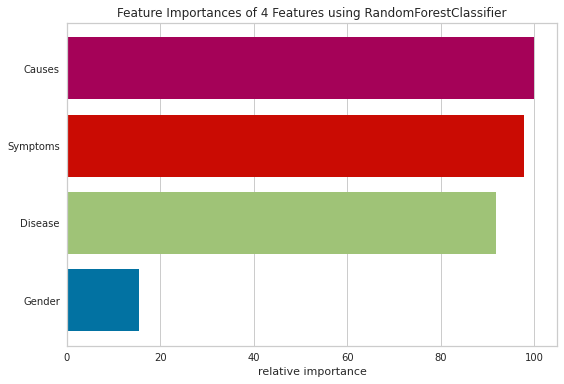

Out[174]: <AxesSubplot:title={'center':'Feature Importances of 4 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

/databricks/python/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


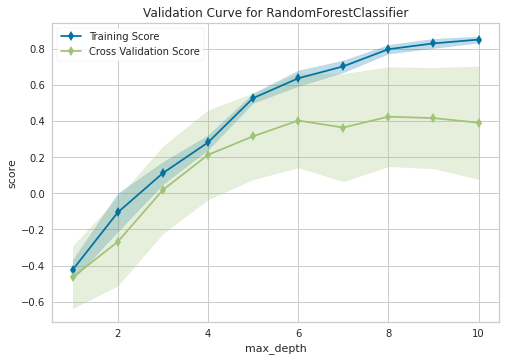

Out[172]: <AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [ ]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [ ]:
# Disease Predictive Modelling
df

,Name,Gender,Symptoms,Causes,Disease,Medicine
0,44,2,26,56,14,36
1,41,1,30,51,39,55
2,57,2,39,41,8,18
3,18,1,38,19,24,44
4,3,2,41,6,58,47
...,...,...,...,...,...,...
282,7,1,18,9,10,1
283,49,2,32,2,4,63
284,82,1,35,39,44,14
285,62,2,38,20,44,48


In [ ]:
X = df[['Gender', 'Symptoms', 'Causes', 'Medicine']]
y = df['Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

svc_model = SVC(kernel='linear', C=0.025)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
bayes_pred = bayes_model.predict(X_test)

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, knn_pred))
print('SVC Accuracy:', accuracy_score(y_test, svc_pred))
print('Naive Bayes Accuracy:', accuracy_score(y_test, svc_pred))
print("Decision Tree Model", accuracy_score(y_test, dt_pred))


Random Forest Accuracy: 0.8448275862068966
K-Nearest Neighbors Accuracy: 0.7241379310344828
SVC Accuracy: 0.7068965517241379
Naive Bayes Accuracy: 0.7068965517241379
Decision Tree Model 0.6379310344827587


In [ ]:
import pickle
# Download best model, Random Forest Algorithm
pickle.dump(rf_model, open('rf_model_dis.pkl', 'wb'))

In [ ]:
# Data Visualizations

In [ ]:
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()

viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

NameError: name 'Rank2D' is not defined